# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to discover patterns, detect anomalies, test assumptions, and check data quality before applying formal modeling or machine learning techniques.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#IGNORE WARNINGS
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("surat.csv")     #Reading CSV file
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   4525 non-null   object
 1   areaWithType    4525 non-null   object
 2   square_feet     4525 non-null   object
 3   transaction     4421 non-null   object
 4   status          4524 non-null   object
 5   floor           4480 non-null   object
 6   furnishing      4185 non-null   object
 7   facing          3936 non-null   object
 8   description     3154 non-null   object
 9   price_per_sqft  4157 non-null   object
 10  price           4525 non-null   object
dtypes: object(11)
memory usage: 389.0+ KB


In [3]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction        104
status               1
floor               45
furnishing         340
facing             589
description       1371
price_per_sqft     368
price                0
dtype: int64

In [4]:
df.nunique()

property_name     1992
areaWithType         6
square_feet       1399
transaction         38
status             138
floor              222
furnishing          78
facing             176
description       2588
price_per_sqft    2134
price              841
dtype: int64

In [5]:
df.columns

Index(['property_name', 'areaWithType', 'square_feet', 'transaction', 'status',
       'floor', 'furnishing', 'facing', 'description', 'price_per_sqft',
       'price'],
      dtype='object')

In [6]:
df["price"] = df["price"].str.lstrip("₹")
df["price"] = df["price"].str.rstrip(" Lac")
df["price"] = df["price"].str.rstrip(" Cr")
df['square_feet'] = df['square_feet'].str.rstrip(" sqft")
df['price_per_sqft'] = df['price_per_sqft'].str.rstrip(" per sqft")
df['price_per_sqft'] = df['price_per_sqft'].str.lstrip("₹")
df.head()


,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","2,891",33.8
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"3,551",45.4
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"3,800",44.6
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"3,966",47
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","3,600",45


In [7]:
df[['current floor','total floors']] = df['floor'].str.split('out of' , n=1 , expand= True)
df.head(5)

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price,current floor,total floors
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","2,891",33.8,5,10
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"3,551",45.4,6,14
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"3,800",44.6,5,13
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"3,966",47,6,14
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","3,600",45,Unfurnished,None


In [8]:
df['price_per_sqft'] = df['price_per_sqft'].str.replace(',', '', regex=True)
df['price_per_sqft'] = pd.to_numeric(df['price_per_sqft'], errors='coerce')


In [9]:
df['transaction'] = df['transaction'].fillna(df['transaction'].mode()[0])
df['price_per_sqft'] = df['price_per_sqft'].fillna(df['price_per_sqft'].median())
df['status'] = df['status'].fillna(df['status'].mode()[0])
df['furnishing'] = df['furnishing'].fillna('Unknown')
df['facing'] = df['facing'].fillna('Unknown')
df.drop(columns=['description'], inplace=True) 
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price,current floor,total floors
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,2891.0,33.8,5,10
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,3551.0,45.4,6,14
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,3800.0,44.6,5,13
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700,New Property,Ready to Move,6 out of 14,Unfurnished,East,3966.0,47,6,14
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250,Orchid Fantasia,New Property,Unfurnished,2,2,3600.0,45,Unfurnished,None
...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,4700.0,Call for Price,5,12
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,4700.0,Call for Price,5,16
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,4700.0,Call for Price,7,13
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,4700.0,Call for Price,7,18


In [10]:
df['current floor'] = df['current floor'].astype(str).str.replace('[^0-9]' , "" , regex=True)
df['current floor'] = pd.to_numeric(df['current floor'], errors='coerce')
df['current floor'] = df['current floor'].fillna(df['current floor'].median())
df['total floors'] = df['total floors'].astype(str).str.replace('[^0-9]' , "" , regex=True)
df['total floors'] = pd.to_numeric(df['total floors'], errors='coerce')
df['total floors'] = df['total floors'].fillna(df['total floors'].median())
df['furnishing'] = df['furnishing'].astype(str).str.replace('[^A-Za-z]', " ", regex=True)
df['furnishing'] = df['furnishing'].replace('', np.nan)
df['furnishing'] = df['furnishing'].fillna(df['furnishing'].mode()[0])
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price,current floor,total floors
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,2891.0,33.8,5.0,10.0
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,3551.0,45.4,6.0,14.0
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173,Resale,Ready to Move,5 out of 13,Semi Furnished,East,3800.0,44.6,5.0,13.0
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700,New Property,Ready to Move,6 out of 14,Unfurnished,East,3966.0,47,6.0,14.0
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250,Orchid Fantasia,New Property,Unfurnished,,2,3600.0,45,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,4700.0,Call for Price,5.0,12.0
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,4700.0,Call for Price,5.0,16.0
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,4700.0,Call for Price,7.0,13.0
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,4700.0,Call for Price,7.0,18.0


In [11]:
df = df.drop('floor', axis=1)

In [12]:
df

,property_name,areaWithType,square_feet,transaction,status,furnishing,facing,price_per_sqft,price,current floor,total floors
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644,New Property,Poss. by Oct '24,Unfurnished,West,2891.0,33.8,5.0,10.0
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278,New Property,Poss. by Jan '26,Unfurnished,South -West,3551.0,45.4,6.0,14.0
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173,Resale,Ready to Move,Semi Furnished,East,3800.0,44.6,5.0,13.0
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700,New Property,Ready to Move,Unfurnished,East,3966.0,47,6.0,14.0
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250,Orchid Fantasia,New Property,,2,3600.0,45,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000,New Property,Poss. by Dec '26,Unfurnished,South - East,4700.0,Call for Price,5.0,12.0
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600,New Property,Poss. by Dec '25,Unfurnished,South - East,4700.0,Call for Price,5.0,16.0
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250,New Property,Poss. by Dec '25,Unfurnished,North - East,4700.0,Call for Price,7.0,13.0
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450,New Property,Ready to Move,Unfurnished,North - West,4700.0,Call for Price,7.0,18.0


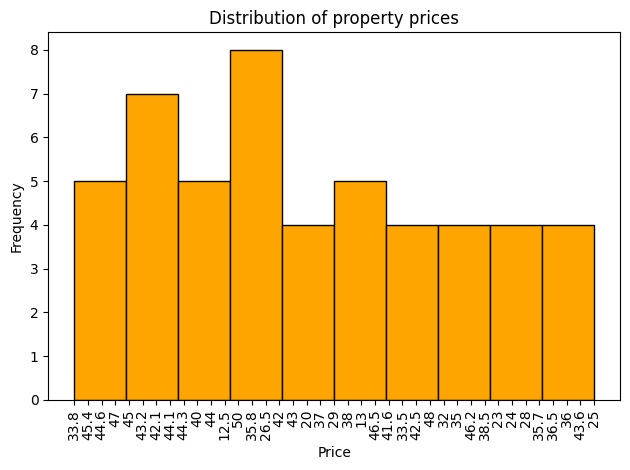

In [13]:
plt.hist(df['price'].head(50), color = "orange" ,edgecolor = 'black' )
plt.title("Distribution of property prices")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


In [14]:
df['bhk'] = df['property_name'].str.extract(r'(\d+)\s*BHK').astype(float)
df

,property_name,areaWithType,square_feet,transaction,status,furnishing,facing,price_per_sqft,price,current floor,total floors,bhk
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644,New Property,Poss. by Oct '24,Unfurnished,West,2891.0,33.8,5.0,10.0,2.0
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278,New Property,Poss. by Jan '26,Unfurnished,South -West,3551.0,45.4,6.0,14.0,2.0
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173,Resale,Ready to Move,Semi Furnished,East,3800.0,44.6,5.0,13.0,2.0
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700,New Property,Ready to Move,Unfurnished,East,3966.0,47,6.0,14.0,2.0
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250,Orchid Fantasia,New Property,,2,3600.0,45,5.0,12.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000,New Property,Poss. by Dec '26,Unfurnished,South - East,4700.0,Call for Price,5.0,12.0,6.0
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600,New Property,Poss. by Dec '25,Unfurnished,South - East,4700.0,Call for Price,5.0,16.0,4.0
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250,New Property,Poss. by Dec '25,Unfurnished,North - East,4700.0,Call for Price,7.0,13.0,5.0
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450,New Property,Ready to Move,Unfurnished,North - West,4700.0,Call for Price,7.0,18.0,6.0


In [15]:
df['location'] = df['property_name'].str.extract(r'in ([a-zA-Z\s]+) Surat', expand=False).str.strip()
avg_price_per_sqft = df.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False)
print(avg_price_per_sqft.head(10))  # Show top 10 locations

location
Kim                            548439.565217
Meera Nagar                    200000.000000
tusli niketan society          166667.000000
shiv banglow olpad              97222.000000
Akshardeep society katargam     84769.000000
Society                         84259.333333
Surat Textile Market            57815.500000
Ram Nagar                       35000.000000
Mahidhar Pur                    29958.500000
Ring Road                       28957.866667
Name: price_per_sqft, dtype: float64


In [16]:
df.describe()

,price_per_sqft,current floor,total floors,bhk
count,4.525000e+03,4525.000000,4525.000000,3889.000000
mean,9.089595e+03,5.292376,10.042652,2.840833
std,1.860031e+05,2.656182,4.425800,1.092492
min,1.000000e+00,1.000000,1.000000,1.000000
25%,3.759000e+03,4.000000,5.000000,2.000000
50%,4.700000e+03,5.000000,12.000000,3.000000
75%,6.033000e+03,6.000000,13.000000,3.000000
max,1.250000e+07,20.000000,59.000000,10.000000


In [17]:
a = df['location'].value_counts()
print(a)
b = df['bhk'].value_counts()
print(b)

location
Vesu                           222
Adajan                         194
Pal                            179
Palanpur                       154
Dindoli                         95
                              ... 
Ram Nagar                        1
hojiwala indrustrial estate      1
gaurav path road                 1
Madhav park                      1
Sky City Luxuria                 1
Name: count, Length: 444, dtype: int64
bhk
3.0     1479
2.0     1173
4.0      657
1.0      339
5.0      183
6.0       40
7.0        8
8.0        6
10.0       3
9.0        1
Name: count, dtype: int64


In [18]:
df['price'] = df['price'].astype(str).str.replace(',', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])          # Remove rows with missing price

df['square_feet'] = df['square_feet'].astype(str).str.replace('[^0-9]', '', regex=True)
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')

# Drop rows with missing values in either column
df = df.dropna(subset=['square_feet', 'price'])


PRICE ANALYSIS

In [19]:
avg_price_bhk = df.groupby('bhk')['price'].mean()
print(avg_price_bhk)
avg_price_location = df.groupby('location')['price'].mean()
print(avg_price_location)
correlation = df['square_feet'].corr(df['price'])
print("Correlation between square_feet and price:", correlation)


bhk
1.0     23.142741
2.0     43.803408
3.0     45.040082
4.0      8.910093
5.0      9.584341
6.0     11.098947
7.0     21.551250
8.0     30.750000
9.0     90.000000
10.0     1.750000
Name: price, dtype: float64
location
AMBIKA ROW HOUSE                             38.00
ASHTVINAYAK RESIDENCY                        39.00
Aagam appartment                             78.00
Aarav Apartment                              25.00
Aastha bunglow                               12.50
                                             ...  
veer arihanta                                74.90
veer savarkar heights                        26.00
vip                                           1.40
vk farm dumas                                 2.75
vraj vihar complex koli street adajan gam    25.00
Name: price, Length: 422, dtype: float64
Correlation between square_feet and price: -0.020425936079550427


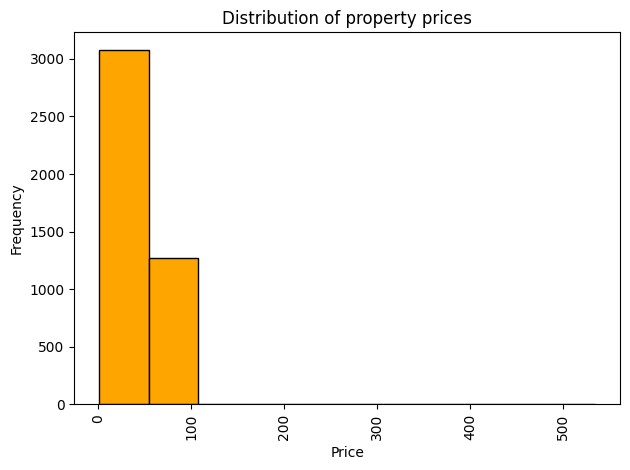

In [20]:
plt.hist(df['price'], color = "orange" ,edgecolor = 'black' )
plt.title("Distribution of property prices")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

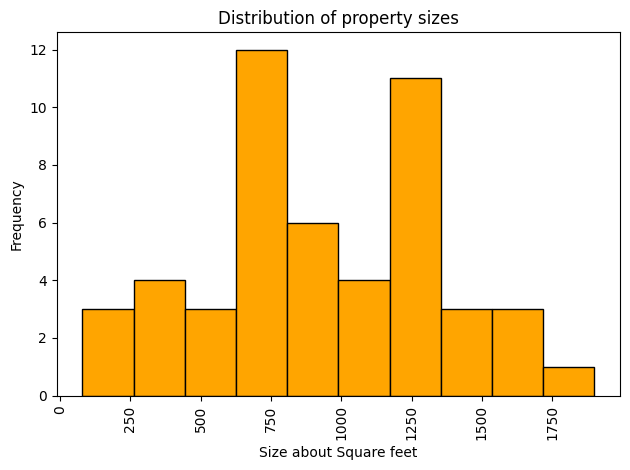

In [21]:
plt.hist(df['square_feet'].head(50), color = "orange" ,edgecolor = 'black' )
plt.title("Distribution of property sizes")
plt.xlabel('Size about Square feet')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

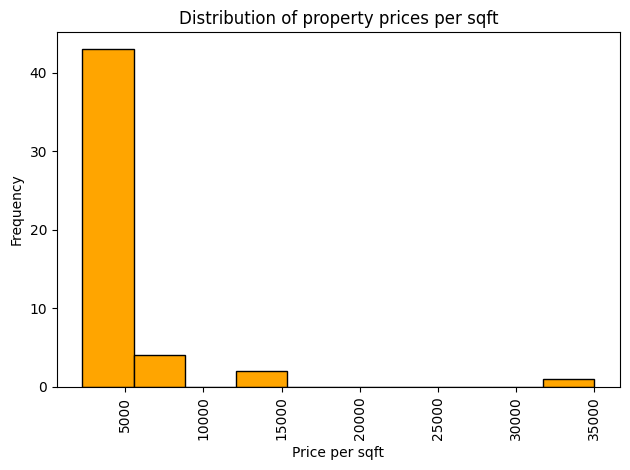

In [22]:
plt.hist(df['price_per_sqft'].head(50), color = "orange" ,edgecolor = 'black' )
plt.title("Distribution of property prices per sqft")
plt.xlabel('Price per sqft')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

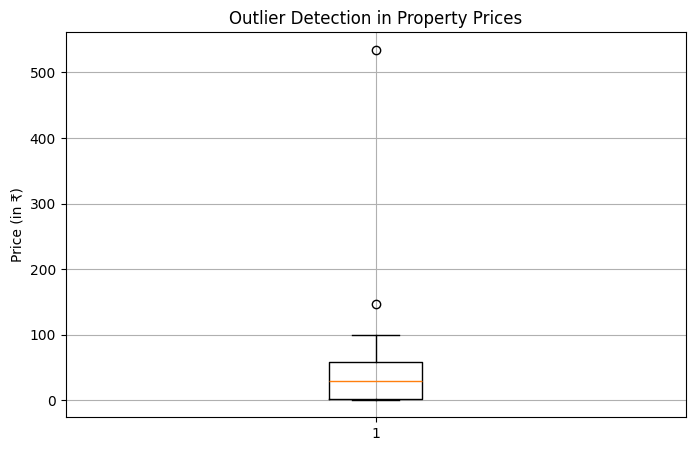

In [23]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['price'])
plt.title("Outlier Detection in Property Prices")
plt.ylabel("Price (in ₹)")
plt.grid(True)
plt.show()

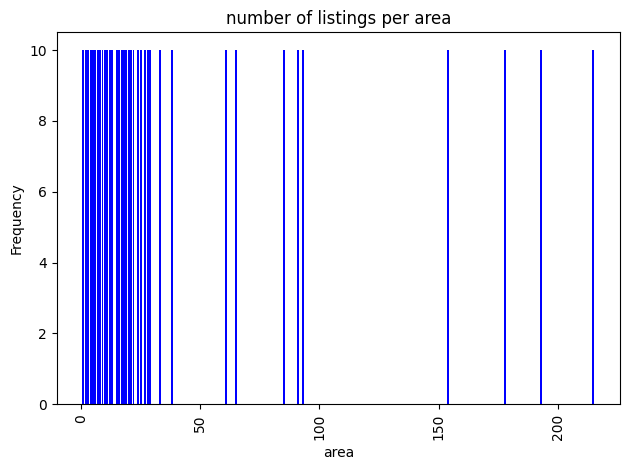

In [24]:
a = df['location'].value_counts()
plt.bar(a, color = "blue"  ,height = 10 )
plt.title("number of listings per area")
plt.xlabel('area')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


Scatter plot: price vs square_feet

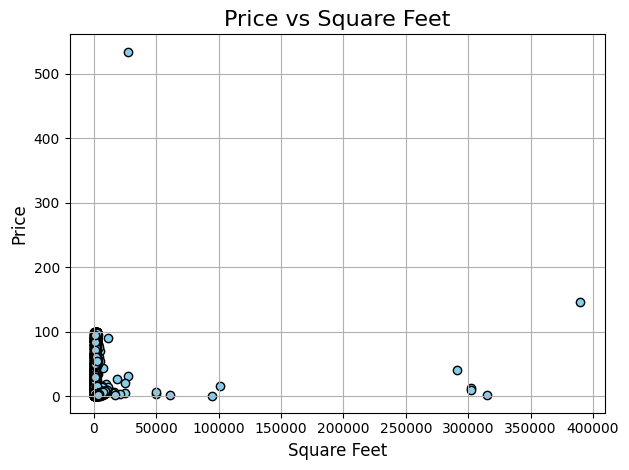

In [25]:
plt.scatter(df['square_feet'], df['price'], color='skyblue', edgecolors='black')

plt.title("Price vs Square Feet", fontsize=16)
plt.xlabel("Square Feet", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()